In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
data=pd.read_csv("titanic dataset.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [106]:
data.shape

(891, 12)

In [107]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [108]:
data.duplicated().sum()

0

In [109]:
print(data[data['Sex']=='male']['Survived'].sum())
print(data[data['Sex']=='female']['Survived'].sum())


109
233


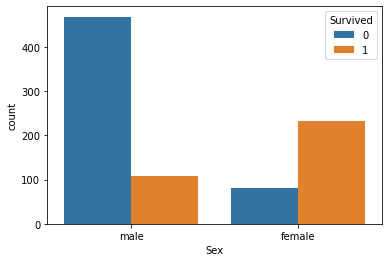

In [110]:
sns.countplot(data=data,x='Sex',hue='Survived')
plt.show()

<AxesSubplot:xlabel='Embarked', ylabel='count'>

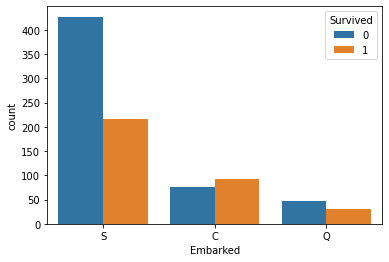

In [111]:
sns.countplot(data=data,x='Embarked',hue='Survived')

<AxesSubplot:xlabel='Pclass', ylabel='count'>

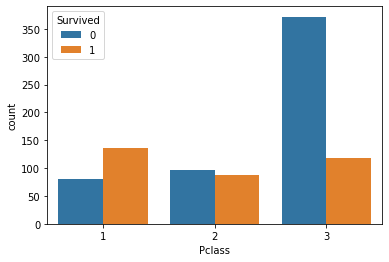

In [112]:
sns.countplot(data=data,x='Pclass',hue='Survived')

<AxesSubplot:xlabel='SibSp', ylabel='count'>

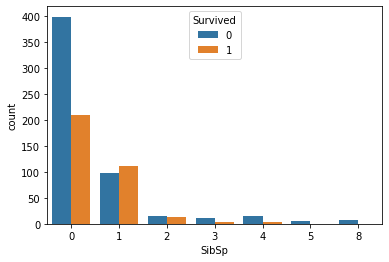

In [113]:
sns.countplot(data=data,x='SibSp',hue='Survived')


<AxesSubplot:xlabel='Parch', ylabel='count'>

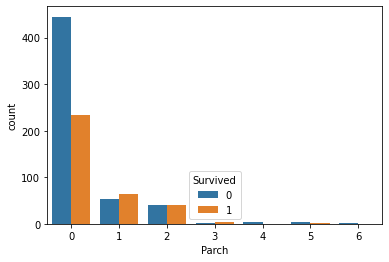

In [114]:
sns.countplot(data=data,x='Parch',hue='Survived')


<AxesSubplot:xlabel='Age', ylabel='Count'>

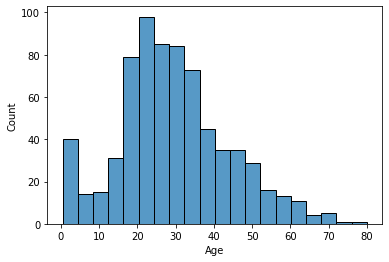

In [115]:
sns.histplot(data['Age'])

In [116]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [117]:
mean_male=data[data['Sex']=='male']['Age'].mean()
mean_male

30.72664459161148

In [118]:
mean_female=data[data['Sex']=='female']['Age'].mean()
mean_female

27.915708812260537

In [119]:
data.loc[data['Sex']=='male','Age']=data[data['Sex']=='male']['Age'].fillna(value=mean_male)

In [120]:
data.loc[data['Sex']=='female','Age']=data[data['Sex']=='female']['Age'].fillna(value=mean_female)


In [122]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [123]:
data.drop(['PassengerId','SibSp','Parch','Ticket','Cabin','Name'],axis=1,inplace=True)

In [124]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [125]:
data.dropna(inplace=True)

In [126]:
data.isna().sum()

Survived    0
Pclass      0
Sex         0
Age         0
Fare        0
Embarked    0
dtype: int64

In [128]:
data.replace({'female':0,'male':1},inplace=True)
data

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,1,22.000000,7.2500,S
1,1,1,0,38.000000,71.2833,C
2,1,3,0,26.000000,7.9250,S
3,1,1,0,35.000000,53.1000,S
4,0,3,1,35.000000,8.0500,S
...,...,...,...,...,...,...
886,0,2,1,27.000000,13.0000,S
887,1,1,0,19.000000,30.0000,S
888,0,3,0,27.915709,23.4500,S
889,1,1,1,26.000000,30.0000,C
